In [1]:
# data files path: ./data/

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from feature_extractor import *
from cluster_events import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import RandomForest as rf
import KNN as knn
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
import GaussianNaiveBayes as gnb
import neaural_net as nn
import logisitic_regression as log_reg
import dummy_classifier as dumm
import svm as svm
import EnsembleLearning as el

In [3]:
dataPath = '../data/'

In [4]:
users = pd.read_csv(dataPath + "users.csv")
users.head()

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [5]:
# set max display col
# pd.set_option('display.max_colwidth', -1)
# pd.reset_option('display.max_colwidth')
user_friends = pd.read_csv(dataPath + "user_friends.csv")
user_friends.head()

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


In [8]:
events_cc = pd.read_csv(dataPath + 'events_city_country.csv')
events_cc.head()

,event_id,city,country
0,684921758,NaN,NaN
1,244999119,NaN,NaN
2,3928440935,NaN,NaN
3,2582345152,NaN,NaN
4,1051165850,NaN,NaN


In [9]:
train_data = pd.read_csv(dataPath + 'train.csv')
train_data.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [10]:
# gender and dob
# check for nulls
# users['birthyear'].isna().values.any()
# 'None' in users['birthyear'].unique()
# train_data['gender'].unique()

#     return merged_df2

train_data = add_gender_age(train_data, users)
train_data = add_location_features(train_data, events, users)
train_data = add_event_creator_friend_timestamp_feature(train_data, events, user_friends)
train_data.head()

NameError: name 'events' is not defined

In [9]:
event_attendees_data = pd.read_csv(dataPath + 'event_attendees.csv')
event_attendees_data.head()

,event,yes,maybe,invited,no
0,1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
1,686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
2,1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
3,2621578336,NaN,NaN,NaN,NaN
4,855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232


In [10]:
train_data = get_event_attendee_nums(train_data, event_attendees_data)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,is_creator_friend,not_start_diff,yes,maybe,invited,no,f4,f5,f6
0,2012-10-30 01:48:25.617000+00:00,0,0,2352676247,False,False,4236494,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-425495.0,17,18,556,10,0.588235,1.058824,32.705882
1,2012-11-01 08:23:07.912000+00:00,0,0,2352676247,False,False,244644122,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-229013.0,17,18,556,10,0.588235,1.058824,32.705882
2,2012-11-02 17:53:30.607000+00:00,0,0,2352676247,False,False,912476748,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-108390.0,17,18,556,10,0.588235,1.058824,32.705882
3,2012-10-30 18:47:27.937000+00:00,0,0,2352676247,False,False,1666085128,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-364353.0,17,18,556,10,0.588235,1.058824,32.705882
4,2012-10-31 19:32:50.373000+00:00,0,0,2352676247,False,False,1804164018,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-275230.0,17,18,556,10,0.588235,1.058824,32.705882


In [12]:
# test_merge_df = pd.merge(train_data, user_friends, how='inner', left_on='user', right_on='user')
# test_merge_df.head()

In [11]:
train_data = get_friends_attendee_nums(train_data, user_friends, event_attendees_data)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,...,invited,no,f4,f5,f6,friends,f7,f8,f9,f10
0,2012-10-30 01:48:25.617000+00:00,0,0,2352676247,False,False,4236494,2352676247,2939696577,2012-11-04T00:00:00.001Z,...,556,10,0.588235,1.058824,32.705882,596,0,1,1,30
1,2012-10-30 01:48:28.645000+00:00,1,0,152418051,False,True,4236494,152418051,1618377432,2012-11-03T07:00:00.003Z,...,5597,596,0.707838,0.959620,6.647268,596,5,1,6,36
2,2012-11-01 08:23:07.912000+00:00,0,0,2352676247,False,False,244644122,2352676247,2939696577,2012-11-04T00:00:00.001Z,...,556,10,0.588235,1.058824,32.705882,872,9,4,10,226
3,2012-11-01 08:23:07.912000+00:00,1,0,152418051,False,True,244644122,152418051,1618377432,2012-11-03T07:00:00.003Z,...,5597,596,0.707838,0.959620,6.647268,872,4,3,4,44
4,2012-11-01 08:23:07.912000+00:00,0,0,1859823732,False,False,244644122,1859823732,199568896,2012-11-04T00:00:00.001Z,...,267,9,0.692308,1.000000,20.538462,872,0,0,0,10


In [12]:
pd.set_option('display.max_columns', None)
train_data = get_friends_attendee_ratios(train_data)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,is_creator_friend,not_start_diff,yes,maybe,invited,no,f4,f5,f6,friends,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
0,2012-10-30 01:48:25.617000+00:00,0,0,2352676247,False,False,4236494,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-425495.0,17,18,556,10,0.588235,1.058824,32.705882,596,0,1,1,30,0.000000,0.000000,0.000000,0.000000,0.001678,0.001678,0.050336,0.017986
1,2012-10-30 01:48:28.645000+00:00,1,0,152418051,False,True,4236494,152418051,1618377432,2012-11-03T07:00:00.003Z,False,-364292.0,842,808,5597,596,0.707838,0.959620,6.647268,596,5,1,6,36,0.200000,1.200000,7.200000,0.008389,0.001678,0.010067,0.060403,0.106486
2,2012-11-01 08:23:07.912000+00:00,0,0,2352676247,False,False,244644122,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-229013.0,17,18,556,10,0.588235,1.058824,32.705882,872,9,4,10,226,0.444444,1.111111,25.111111,0.010321,0.004587,0.011468,0.259174,0.017986
3,2012-11-01 08:23:07.912000+00:00,1,0,152418051,False,True,244644122,152418051,1618377432,2012-11-03T07:00:00.003Z,False,-167813.0,842,808,5597,596,0.707838,0.959620,6.647268,872,4,3,4,44,0.750000,1.000000,11.000000,0.004587,0.003440,0.004587,0.050459,0.106486
4,2012-11-01 08:23:07.912000+00:00,0,0,1859823732,False,False,244644122,1859823732,199568896,2012-11-04T00:00:00.001Z,False,-229013.0,13,13,267,9,0.692308,1.000000,20.538462,872,0,0,0,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011468,0.033708


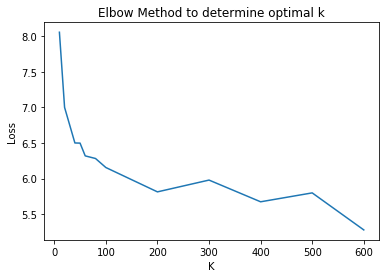

In [16]:
K = [10, 20, 40, 50, 60, 80, 100, 200, 300, 400, 500, 600]
loss = [8.0545744270306, 7.000246119336558, 6.500759436696417, 6.498793292784846, 6.319748048076176, 6.282755542893157,  6.1563728574075745, 5.814683235919998, 5.9800807168807415, 5.675408336909335, 5.800346960036805, 5.280742720821256]
import matplotlib.pyplot as plt
plt.plot(K, loss)
plt.xlabel('K')
plt.ylabel('Loss')
plt.title('Elbow Method to determine optimal k')
# plt.show()
plt.savefig(outputPath + 'elbow.png')

In [ ]:
# Get and save events clusters
k = 50 #50
event_clusters = get_clusters(events, k)
event_clusters.to_csv(dataPath + 'event_clusters_50.csv', na_rep = 'NA', header = True, index = False)

k = 200 #50
event_clusters = get_clusters(events, k)
event_clusters.to_csv(dataPath + 'event_clusters_200.csv', na_rep = 'NA', header = True, index = False)

In [18]:
(user_attendance_yes, user_attendance_maybe, user_attendance_no, user_attendance_invited) = get_user_attendance(event_attendees_data, events)

user_attendance_yes.to_csv(dataPath + 'user_attendance_yes.csv' , na_rep = 'NA', header = True, index = False)
user_attendance_maybe.to_csv(dataPath + 'user_attendance_maybe.csv' , na_rep = 'NA', header = True, index = False)
user_attendance_no.to_csv(dataPath + 'user_attendance_no.csv' , na_rep = 'NA', header = True, index = False)
user_attendance_invited.to_csv(dataPath + 'user_attendance_invited.csv' , na_rep = 'NA', header = True, index = False)

In [25]:
# load processed data
# PBM - list read as string

# event_clusters = pd.read_csv(dataPath + 'event_clusters_200.csv')
# user_attendance_yes = pd.read_csv(dataPath + 'user_attendance_yes.csv')
# user_attendance_maybe = pd.read_csv(dataPath + 'user_attendance_maybe.csv')
# user_attendance_no = pd.read_csv(dataPath + 'user_attendance_no.csv')
# user_attendance_invited = pd.read_csv(dataPath + 'user_attendance_invited.csv')

In [253]:
train_data = get_cluster_sim_by_user_attendance(train_data, event_clusters, user_attendance_yes, user_attendance_maybe, user_attendance_no, user_attendance_invited)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,is_creator_friend,not_start_diff,yes,maybe,invited,no,f4,f5,f6,friends,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,sim_yes_cluster,sim_maybe_cluster,sim_no_cluster,sim_invited_cluster
0,2012-10-02 15:53:05.754000+00:00,0,0,1918771225,False,False,3044012,1918771225,4106419938,2012-10-03T08:00:00.002Z,False,-58015.0,83.0,20.0,249.0,269.0,3.240964,0.240964,3.000000,9269,0,3,0,3,0.0,0.0,0.0,0.000000,0.000324,0.0,0.000324,1.080321,NaN,NaN,NaN,NaN
1,2012-10-02 15:53:05.754000+00:00,0,0,1502284248,False,False,3044012,1502284248,2016654644,2012-10-03T11:00:00.003Z,False,-68815.0,106.0,63.0,1312.0,21.0,0.198113,0.594340,12.377358,9269,0,0,0,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000108,0.016006,NaN,NaN,NaN,NaN
2,2012-10-02 15:53:05.754000+00:00,1,0,2529072432,False,False,3044012,2529072432,3639934255,2012-10-26T13:30:00.003Z,False,-2065015.0,2278.0,1648.0,41337.0,1476.0,0.647937,0.723442,18.146181,9269,0,0,0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000216,0.035707,NaN,NaN,NaN,NaN
3,2012-10-02 15:53:05.754000+00:00,0,0,3072478280,False,False,3044012,3072478280,97461525,2012-10-06T05:00:00.003Z,False,-306415.0,85.0,64.0,94.0,0.0,0.000000,0.752941,1.105882,9269,1,0,0,0,0.0,0.0,0.0,0.000108,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN
4,2012-10-02 15:53:05.754000+00:00,0,0,1390707377,False,False,3044012,1390707377,3639934255,2012-10-06T03:00:00.003Z,False,-299215.0,886.0,700.0,41020.0,590.0,0.665914,0.790068,46.297968,9269,0,0,0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000216,0.014383,NaN,NaN,NaN,NaN


In [309]:
train_data = get_cluster_sim_by_user_friends_attendance(train_data, event_clusters, user_friends, user_attendance_yes, user_attendance_maybe, user_attendance_no, user_attendance_invited)
# train_data.head()

In [310]:
train_data.head

<bound method NDFrame.head of                               timestamp  interested  not_interested  \
0      2012-10-02 15:53:05.754000+00:00           0               0   
1      2012-10-02 15:53:05.754000+00:00           0               0   
2      2012-10-02 15:53:05.754000+00:00           1               0   
3      2012-10-02 15:53:05.754000+00:00           0               0   
4      2012-10-02 15:53:05.754000+00:00           0               0   
...                                 ...         ...             ...   
15393  2012-12-08 03:59:43.169000+00:00           0               0   
15394  2012-12-08 03:59:43.169000+00:00           0               0   
15395  2012-12-08 03:59:43.169000+00:00           0               0   
15396  2012-12-08 03:59:43.169000+00:00           0               0   
15397  2012-12-08 03:59:43.169000+00:00           1               0   

            event  same_city  same_country        user    event_id  \
0      1918771225      False         False     

In [326]:
train_data = get_sim_by_user_attendance(train_data, user_attendance_yes, user_attendance_maybe, event_attendees_data)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,is_creator_friend,not_start_diff,yes,maybe,invited,no,f4,f5,f6,friends,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,sim_yes_cluster,sim_maybe_cluster,sim_no_cluster,sim_invited_cluster,sim_friends_yes_cluster,sim_friends_maybe_cluster,sim_friends_no_cluster,event_att_yes_sim,event_att_maybe_sim
0,2012-10-02 15:53:05.754000+00:00,0,0,1918771225,False,False,3044012,1918771225,4106419938,2012-10-03T08:00:00.002Z,False,-58015.0,83.0,20.0,249.0,269.0,3.240964,0.240964,3.000000,9269,0,3,0,3,0.0,0.0,0.0,0.000000,0.000324,0.0,0.000324,1.080321,NaN,NaN,NaN,NaN,38.239356,69.264661,40.280149,0.0,0.0
1,2012-10-02 15:53:05.754000+00:00,0,0,1502284248,False,False,3044012,1502284248,2016654644,2012-10-03T11:00:00.003Z,False,-68815.0,106.0,63.0,1312.0,21.0,0.198113,0.594340,12.377358,9269,0,0,0,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000108,0.016006,NaN,NaN,NaN,NaN,37.956518,57.653432,37.099581,0.0,0.0
2,2012-10-02 15:53:05.754000+00:00,1,0,2529072432,False,False,3044012,2529072432,3639934255,2012-10-26T13:30:00.003Z,False,-2065015.0,2278.0,1648.0,41337.0,1476.0,0.647937,0.723442,18.146181,9269,0,0,0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000216,0.035707,NaN,NaN,NaN,NaN,43.301546,55.075750,40.263049,0.0,0.0
3,2012-10-02 15:53:05.754000+00:00,0,0,3072478280,False,False,3044012,3072478280,97461525,2012-10-06T05:00:00.003Z,False,-306415.0,85.0,64.0,94.0,0.0,0.000000,0.752941,1.105882,9269,1,0,0,0,0.0,0.0,0.0,0.000108,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,51.376349,57.472911,49.568598,0.0,0.0
4,2012-10-02 15:53:05.754000+00:00,0,0,1390707377,False,False,3044012,1390707377,3639934255,2012-10-06T03:00:00.003Z,False,-299215.0,886.0,700.0,41020.0,590.0,0.665914,0.790068,46.297968,9269,0,0,0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000216,0.014383,NaN,NaN,NaN,NaN,61.547985,61.175950,61.535527,0.0,0.0


In [327]:
train_data.shape

(15398, 41)

In [ ]:
train_data

In [334]:
features = ['same_city',
       'same_country', 
       'is_creator_friend', 'not_start_diff', 'yes', 'maybe', 'invited', 'no',
       'f4', 'f5', 'f6', 'friends', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'sim_yes_cluster',
       'sim_maybe_cluster', 'sim_no_cluster', 'sim_invited_cluster',
       'sim_friends_yes_cluster', 'sim_friends_maybe_cluster',
       'sim_friends_no_cluster', 'interested']
train_data_ids = train_data[['event', 'user']]
train_data = train_data[features]

In [335]:
train_data = train_data.ffill().bfill()

In [339]:
train_data.to_csv(dataPath + 'processed_train.csv', na_rep = 'NA', header = True, index = False)
train_data_ids.to_csv(dataPath + 'train_ids.csv', na_rep = 'NA', header = True, index = False)

In [ ]:
# train_data = pd.read_csv(dataPath + 'processed_train.csv')

In [ ]:
##########################################################

In [436]:
y = train_data['interested']
X = train_data.drop('interested', 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99, stratify = y)

In [437]:
X_train.to_csv(dataPath + 'X_train.csv', na_rep = 'NA', header = True, index = False)
X_test.to_csv(dataPath + 'X_test.csv', na_rep = 'NA', header = True, index = False)
y_train.to_csv(dataPath + 'y_train.csv', na_rep = 'NA', header = True, index = False)
y_test.to_csv(dataPath + 'y_test.csv', na_rep = 'NA', header = True, index = False)

In [ ]:
# X_train = pd.read_csv(dataPath + 'X_train.csv')
# X_test = pd.read_csv(dataPath + 'X_test.csv')
# y_train = pd.read_csv(dataPath + 'y_train.csv')
# y_test = pd.read_csv(dataPath + 'y_test.csv')

In [440]:
print("Baseline Metrics")
print("k folds f0.5")
dummy_model = dumm.fit(X_train, y_train)

Baseline Metrics
k folds f0.5
F0.5 Cross Validation Scores:  [0.31425311 0.31425311 0.31425311 0.31437268 0.31437268]


In [441]:
y_predicted = dumm.fit_predict(X_train, y_train, X_test, dummy_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

accuracy
0.2681818181818182
f0.5
0.31416400425985086


In [442]:
# RANDOM FOREST f0.5
print("k folds f0.5")
rf_model = rf.fit(X_train, y_train)

k folds f0.5
[0.50669216 0.48442907 0.53447185 0.51724138 0.49439684]


In [443]:
y_predicted = rf.fit_predict(X_train, y_train, X_test, rf_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

accuracy
0.7746753246753246
f0.5
0.5323383084577115


In [444]:
#KNN f0.5
print("k fold f0.5")
knn_model = knn.fit(X_train, y_train)

k fold f0.5
[0.45328911 0.49041096 0.47453083 0.46322291 0.47833427]


In [446]:
y_predicted = knn.fit_predict(X_train, y_train, X_test, knn_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

accuracy
0.7616883116883116
f0.5
0.5085435313262815


In [447]:
# GAUSSAIN NAIVE BAYES
print("k fold f0.5")
gnb_model = gnb.fit(X_train, y_train.values.ravel())

k fold f0.5
[0.2512385  0.2759135  0.24914676 0.20882585 0.24825446]


In [448]:
y_predicted = gnb.fit_predict(X_train, y_train.values.ravel(), X_test, gnb_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

accuracy
0.7230519480519481
f0.5
0.27206771463119706


In [449]:
# SVM
print("k fold f0.5")
svm_model = svm.fit(X_train, y_train.values.ravel())

k fold f0.5


C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

[0.37742763 0.37143887 0.38100397 0.37848606 0.38720539]


In [450]:
y_predicted = svm.fit_predict(X_train, y_train.values.ravel(), X_test, svm_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy
0.699025974025974
f0.5
0.3982300884955752


In [458]:
# NEURAL NET
print("k fold f0.5")
neural_net_model = nn.fit(X_train, y_train.values.ravel())

k fold f0.5


C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


F0.5 Cross Validation Scores:  [0.45491972 0.35801266 0.43911752 0.45022718 0.37529138]


In [459]:
y_predicted = nn.fit_predict(X_train, y_train.values.ravel(), X_test, neural_net_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


accuracy
0.7327922077922078
f0.5
0.4452296819787986


In [20]:
# LOGISTIC REGRESSION
print("k fold f0.5")
log_reg_model = log_reg.fit(X_train, y_train.values.ravel())

k fold f0.5
F0.5 Cross Validation Scores:  [0.1870187  0.14364641 0.1940133  0.19977802 0.16687268]


In [21]:
y_predicted = log_reg.fit_predict(X_train, y_train.values.ravel(), X_test, log_reg_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

accuracy
0.7334415584415584
f0.5
0.17395182872435327


In [512]:
# ENSEMBLE
print("k fold f0.5")
estimators=[('rf', rf_model), ('knn', knn_model)]
el_model = el.fit(X_train, y_train, estimators)

k fold f0.5
[0.51604783 0.51934827 0.54769231 0.51724138 0.51118211]


In [513]:
y_predicted = el.fit_predict(X_train, y_train, X_test, el_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

accuracy
0.7772727272727272
f0.5
0.5445304937076476


In [515]:
# ENSEMBLE
print("k fold f0.5")
estimators=[('rf', rf_model), ('knn', knn_model), ('nn', neural_net_model)]
el_model = el.fit(X_train, y_train, estimators)

# Test
y_predicted = el.fit_predict(X_train, y_train, X_test, el_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

k fold f0.5
[0.52759248 0.50705171 0.52899936 0.5264969  0.51604783]
accuracy
0.775974025974026
f0.5
0.5396902226524685


/home/frut/miniconda2/envs/mlproject/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


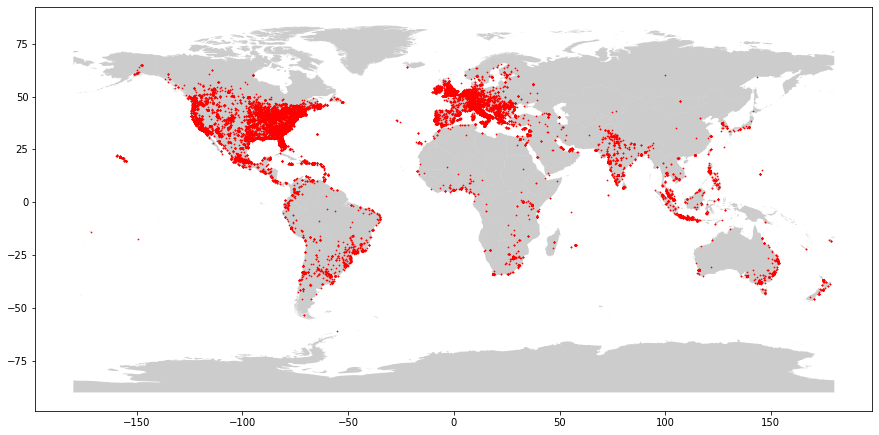

In [40]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

world_map = gpd.read_file('../Igismap/TM_WORLD_BORDERS-0.3.shp')
fig,ax = plt.pyplot.subplots(figsize=[15,15])


geometry = [Point(xy) for xy in zip(events['lng'], events['lat'])]

world_map.plot(ax=ax, alpha=0.4, color="grey")
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(events, crs = crs, geometry = geometry)
geo_df.head()

geo_df.plot(ax=ax, markersize = 2, color = 'red', marker = '.')

/home/frut/miniconda2/envs/mlproject/lib/python3.8/site-packages/geopandas/datasets/naturalearth_cities/naturalearth_cities.shp


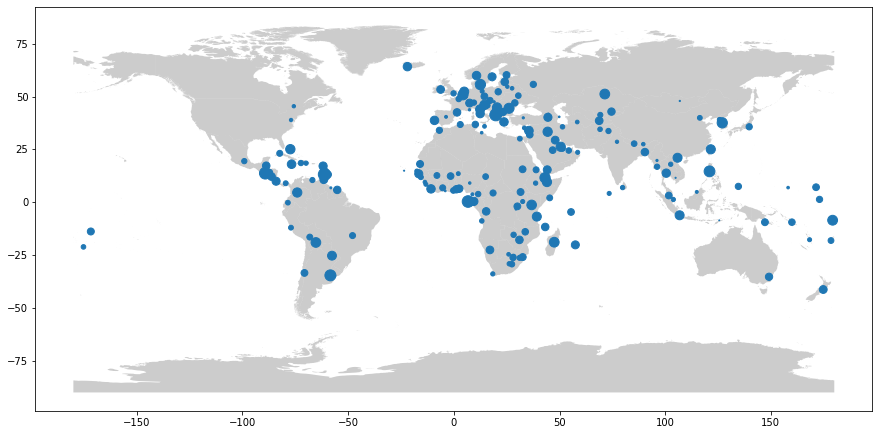

In [47]:
import geopandas


path = geopandas.datasets.get_path('naturalearth_cities')
print(path)


world_map = geopandas.read_file('../Igismap/TM_WORLD_BORDERS-0.3.shp')
fig,ax = plt.pyplot.subplots(figsize=[15,15])
world_map.plot(ax=ax, alpha=0.4, color="grey")

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
# adding a column with random values for the size
cities['values'] = np.abs(np.random.randn(len(cities))) * 50

cities.plot(ax=ax, markersize=cities['values'])

In [32]:
# city = events_cc['city'].value_counts()
train_data = train_data[["user", "event"]]
train_events = pd.merge(train_data , events_cc, how = "inner", left_on='event', right_on='event_id')
train_events.head()

,user,event,event_id,city,country
0,3044012,1918771225,1918771225,NaN,NaN
1,1906220044,1918771225,1918771225,NaN,NaN
2,3044012,1502284248,1502284248,Yogyakarta,Indonesia
3,1302145719,1502284248,1502284248,Yogyakarta,Indonesia
4,3194014105,1502284248,1502284248,Yogyakarta,Indonesia


In [86]:
train_events['cc'] = train_events['city'] + "," + train_events['country']
city = train_events['cc'].value_counts()
city = city.to_frame()
city['address'] = city.index
city.head()

,cc,address
"Medan,Indonesia",1298,"Medan,Indonesia"
"Phnom Penh,Cambodia",882,"Phnom Penh,Cambodia"
"Toronto,Canada",651,"Toronto,Canada"
"Los Angeles,United States",216,"Los Angeles,United States"
"Yogyakarta,Indonesia",215,"Yogyakarta,Indonesia"


In [112]:
from opencage.geocoder import OpenCageGeocode

key = "8f247850d145428988b076c885ae2fe6"  # get api key from:  https://opencagedata.com
geocoder = OpenCageGeocode(key)
query = 'Toronto  Ontario'  
results = geocoder.geocode(query)
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']

print (lat, lng)

43.6534817 -79.3839347


In [89]:
from tqdm import tqdm_notebook

In [90]:
list_lat = []   # create empty lists
list_long = []


for index, row in tqdm_notebook(city.iterrows()): # iterate over rows in dataframe
    
    query = index

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

# create new columns from lists    

city['lat'] = list_lat   
city['lon'] = list_long

<ipython-input-90-04a37623a058>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm_notebook(city.iterrows()): # iterate over rows in dataframe


In [92]:
city.head()

,cc,address,lat,lon
"Medan,Indonesia",1298,"Medan,Indonesia",3.589665,98.673826
"Phnom Penh,Cambodia",882,"Phnom Penh,Cambodia",11.568271,104.922443
"Toronto,Canada",651,"Toronto,Canada",43.653482,-79.383935
"Los Angeles,United States",216,"Los Angeles,United States",34.053691,-118.242767
"Yogyakarta,Indonesia",215,"Yogyakarta,Indonesia",-7.801195,110.364917


/home/frut/miniconda2/envs/mlproject/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


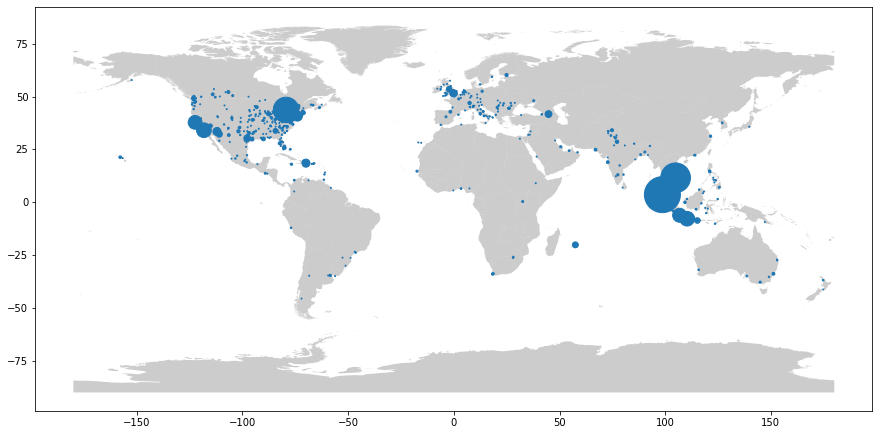

In [93]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

world_map = gpd.read_file('../Igismap/TM_WORLD_BORDERS-0.3.shp')
fig,ax = plt.pyplot.subplots(figsize=[15,15])


geometry = [Point(xy) for xy in zip(city['lon'], city['lat'])]

world_map.plot(ax=ax, alpha=0.4, color="grey")
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(city, crs = crs, geometry = geometry)

geo_df.plot(ax=ax, markersize = geo_df["cc"])

In [94]:
# city = events_cc['city'].value_counts()
train_data = train_data[["user", "event"]]
train_users = pd.merge(train_data , users, how = "inner", left_on='user', right_on='user_id')
train_users.head()

,user,event,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3044012,1918771225,3044012,id_ID,1990,male,2012-10-02T15:50:21.023Z,Binjai,480.0
1,3044012,1502284248,3044012,id_ID,1990,male,2012-10-02T15:50:21.023Z,Binjai,480.0
2,3044012,2529072432,3044012,id_ID,1990,male,2012-10-02T15:50:21.023Z,Binjai,480.0
3,3044012,3072478280,3044012,id_ID,1990,male,2012-10-02T15:50:21.023Z,Binjai,480.0
4,3044012,1390707377,3044012,id_ID,1990,male,2012-10-02T15:50:21.023Z,Binjai,480.0


In [122]:
def sanitize(row):
    ret = ''.join([i for i in row['location'] if not i.isdigit()])
    ret = ret.strip()
    return ret

san_train_users = train_users[train_users.location.notnull()].apply(lambda row:  sanitize(row) , axis=1)
city = san_train_users.value_counts()
city = city.to_frame()
city['address'] = city.index
# city['address'] = city.apply(lambda row:  sanitize(row) , axis=1)
city = city[city.address.notnull()]
city = city[city['address']!= ""]
city.columns = ['count', 'address']
city.head(20)

,count,address
Medan Indonesia,3105,Medan Indonesia
Phnom Penh,1193,Phnom Penh
Yogyakarta,1064,Yogyakarta
Los Angeles California,627,Los Angeles California
Santo Domingo Dominican Republic,529,Santo Domingo Dominican Republic
Toronto Ontario,344,Toronto Ontario
Jakarta Indonesia,226,Jakarta Indonesia
Phnom Pen Phnum Penh Cambodia,217,Phnom Pen Phnum Penh Cambodia
Djokja Yogyakarta Indonesia,181,Djokja Yogyakarta Indonesia
San Francisco California,179,San Francisco California


In [117]:
list_lat = []   # create empty lists
list_long = []


for index, row in tqdm_notebook(city.iterrows()): # iterate over rows in dataframe
    
    query = index
    query = ''.join([i for i in query if not i.isdigit()])
    query = query.strip()
    print(query)
    results = geocoder.geocode(query)
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

# create new columns from lists    


<ipython-input-117-a82cd65d7a48>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm_notebook(city.iterrows()): # iterate over rows in dataframe


Medan  Indonesia
Phnom Penh
Yogyakarta
Los Angeles  California
Santo Domingo  Dominican Republic
Toronto  Ontario
Jakarta  Indonesia
Phnom Pen  Phnum Penh  Cambodia
Djokja  Yogyakarta  Indonesia
San Francisco  California
Jogjakarta  Indonesia
Medan
Los Angeles  CA
Bekasi
Jakarta
Tbilisi  Georgia
New York  New York
Purwokerto  Jawa Tengah  Indonesia
Jombang  Jawa Timur  Indonesia
Surabaya
Oakland  California
Sibolga
Port Louis  Mauritius
Hollywood  California
London  Ontario
Pematangsiantar
Glendale  Arizona
DKI Jakarta
Ottawa  Ontario
Purworejo  Jawa Tengah  Indonesia
Santo Domingo
Jokjakarta  Yogyakarta  Indonesia
Surabaya  Indonesia
Flacq  Flacq  Mauritius
Bantul
Bel Air  Flacq  Mauritius
undefined  undefined
Irvine  California
San Francisco  CA
Phoenix  Arizona
Bandung  Indonesia
Rantauprapat  Sumatera Utara  Indonesia
Seoul  Korea
Madrid  Spain
Curepipe  Mauritius
Manila  Philippines
Padangsidimpuan  Sumatera Utara  Indonesia
Tucson  Arizona
Tempe  Arizona
Mesa  Arizona
Semarang  I

In [123]:
city['lat'] = list_lat   
city['lon'] = list_long

In [124]:
city.head()

,count,address,lat,lon
Medan Indonesia,3105,Medan Indonesia,3.589665,98.673826
Phnom Penh,1193,Phnom Penh,11.568271,104.922443
Yogyakarta,1064,Yogyakarta,-7.801195,110.364917
Los Angeles California,627,Los Angeles California,34.053691,-118.242767
Santo Domingo Dominican Republic,529,Santo Domingo Dominican Republic,18.480197,-69.942111


/home/frut/miniconda2/envs/mlproject/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


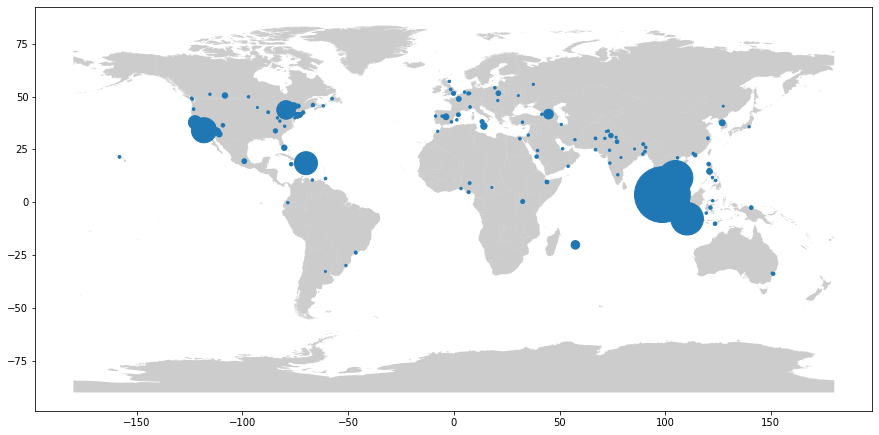

In [125]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

world_map = gpd.read_file('../Igismap/TM_WORLD_BORDERS-0.3.shp')
fig,ax = plt.pyplot.subplots(figsize=[15,15])


geometry = [Point(xy) for xy in zip(city['lon'], city['lat'])]

world_map.plot(ax=ax, alpha=0.4, color="grey")
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(city, crs = crs, geometry = geometry)

geo_df.plot(ax=ax, markersize = geo_df["count"])